<a href="https://colab.research.google.com/github/aryan757/Research_solution/blob/main/Research_interpretablity_LIME_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras,os,cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tqdm import tqdm
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
TRAINING_PATH='https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri'
TESTING_PATH='/kaggle/input/brain-tumor-classification-mri/Testing'

In [6]:
LABELS=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

CHANNEL=3
RANDOM_STATE=101

NUM_CLASSES=4

RESCALE=1./255
ROTATION_RANGE=20

SHEAR_RANGE=0.2
ZOOM_RANGE=0.05

HORIZONTAL_FLIP=True

FILTER_SIZE=3
MAXPOOLING_SIZE=2

LEARNING_RATE=1e-4
BATCH_SIZE=32

SIZE=150

Reading DATA

In [7]:
for label in LABELS:
    folder_path=os.path.join(TRAINING_PATH,label)
    plt.figure(figsize=(20,20))
    x=0
    for i,image_name in enumerate (os.listdir(folder_path)):
        plt.subplot(1,4,i+1)
        img_path=os.path.join(folder_path,image_name)
        img=cv2.imread(img_path)
        plt.title(f'{label}')
        plt.imshow(img)
        x+=1
        if x==4:
            break
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri/glioma_tumor'

<Figure size 2000x2000 with 0 Axes>

In [8]:
# prompt: the data is present in this link , so read this data
# https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet/tree/master/Training as a traning path

TRAINING_PATH = 'https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet/tree/master/Training'


In [10]:
!git clone https://github.com/SartajBhuvaji/Brain-Tumor-Classification-DataSet.git

TRAINING_PATH = 'Brain-Tumor-Classification-DataSet/Training'

Cloning into 'Brain-Tumor-Classification-DataSet'...
remote: Enumerating objects: 3039, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 3039 (delta 0), reused 0 (delta 0), pack-reused 3035 (from 1)
Receiving objects: 100% (3039/3039), 79.25 MiB | 12.27 MiB/s, done.


In [12]:
TESTING_PATH='Brain-Tumor-Classification-DataSet/Testing'

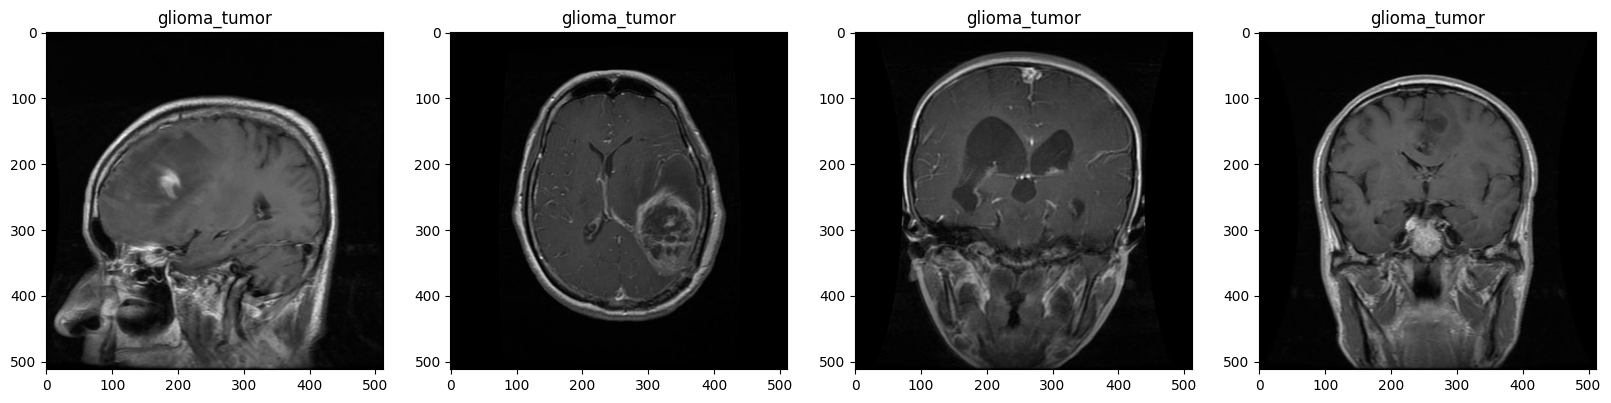

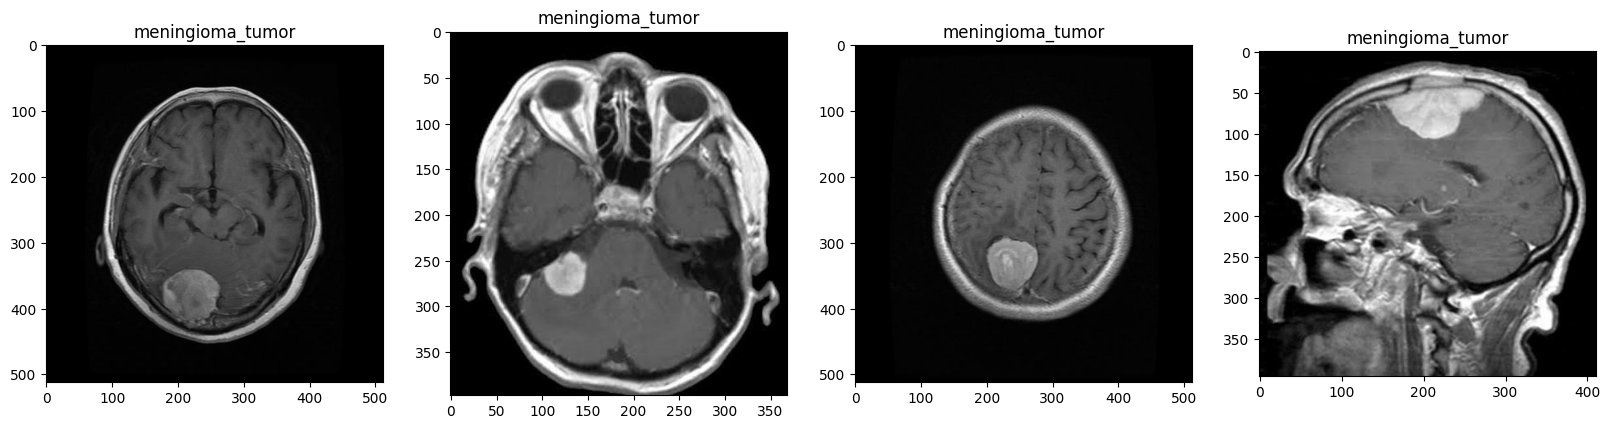

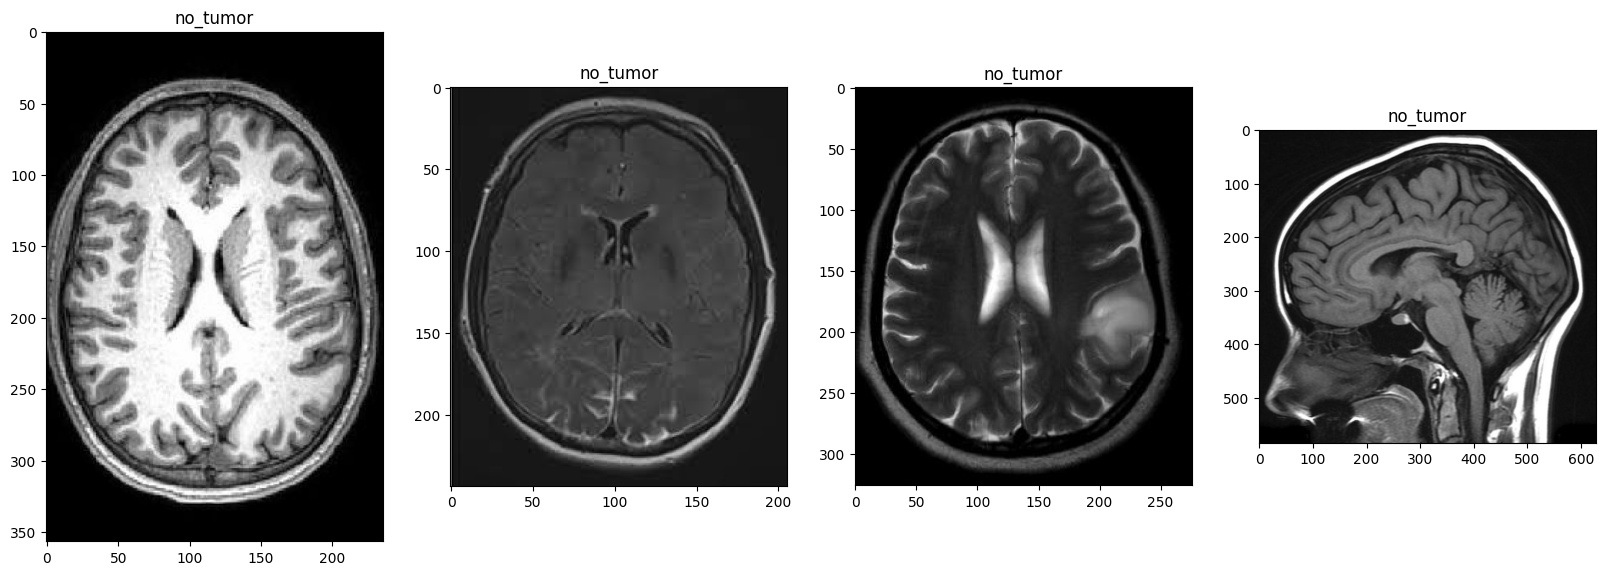

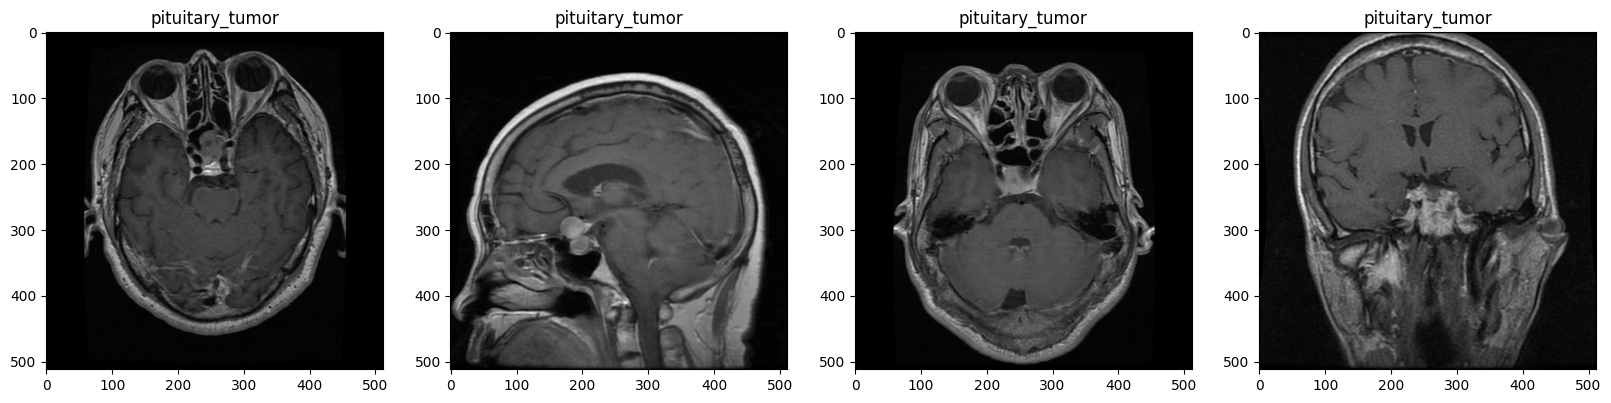

In [11]:
import os
import cv2
import matplotlib.pyplot as plt

LABELS=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']

for label in LABELS:
    folder_path=os.path.join(TRAINING_PATH,label)
    plt.figure(figsize=(20,20))
    x=0
    for i,image_name in enumerate (os.listdir(folder_path)):
        plt.subplot(1,4,i+1)
        img_path=os.path.join(folder_path,image_name)
        img=cv2.imread(img_path)
        plt.title(f'{label}')
        plt.imshow(img)
        x+=1
        if x==4:
            break
    plt.show()

In [13]:
# prompt: show size of images

# Reading DATA
for label in LABELS:
    folder_path=os.path.join(TRAINING_PATH,label)
    x=0
    for i,image_name in enumerate (os.listdir(folder_path)):
        img_path=os.path.join(folder_path,image_name)
        img=cv2.imread(img_path)
        print(f'Image {image_name} size: {img.shape}')
        x+=1
        if x==4:
            break


Image gg (250).jpg size: (512, 512, 3)
Image gg (622).jpg size: (512, 512, 3)
Image gg (330).jpg size: (512, 512, 3)
Image gg (137).jpg size: (512, 512, 3)
Image m (191).jpg size: (512, 512, 3)
Image m1(113).jpg size: (398, 369, 3)
Image m (183).jpg size: (512, 512, 3)
Image m1(156).jpg size: (396, 411, 3)
Image image(143).jpg size: (357, 236, 3)
Image image (22).jpg size: (244, 206, 3)
Image image(242).jpg size: (326, 276, 3)
Image image(304).jpg size: (585, 629, 3)
Image p (683).jpg size: (512, 512, 3)
Image p (225).jpg size: (512, 512, 3)
Image p (696).jpg size: (512, 512, 3)
Image p (398).jpg size: (512, 512, 3)


KEEPING ALL IMAGE AS A SAME SIZE

In [14]:
def read_resize_data(PATH):
    X=[]
    y=[]

    for label in LABELS:

        folder_path=os.path.join(PATH,label)
        for image_name in tqdm(os.listdir(folder_path)):
            img_path=os.path.join(folder_path,image_name)
            img=cv2.imread(img_path)
            img = cv2.resize(img, (SIZE, SIZE))
            #gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            X.append(img)
            y.append(LABELS.index(label))

    return X,y

In [15]:
X_train,y_train=read_resize_data(TRAINING_PATH)
X_test,y_test=read_resize_data(TESTING_PATH)

100%|██████████| 74/74 [00:00<00:00, 232.56it/s]


In [19]:
print(X_train[0:5],y_train[0:5])

[array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [3, 3, 3],
        [3, 3, 3],
        [1, 1, 1]],

       ...,

       [[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2],
        ...,
        [4, 4, 4],
        [3, 3, 3],
        [3, 3, 3]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        ...,
        [3, 3, 3],
        [1, 1, 1],
        [1, 1, 1]],

       [[0, 0, 0],
        [0, 0, 0],
        [1, 1, 1],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,

In [20]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

2870
394
2870
394


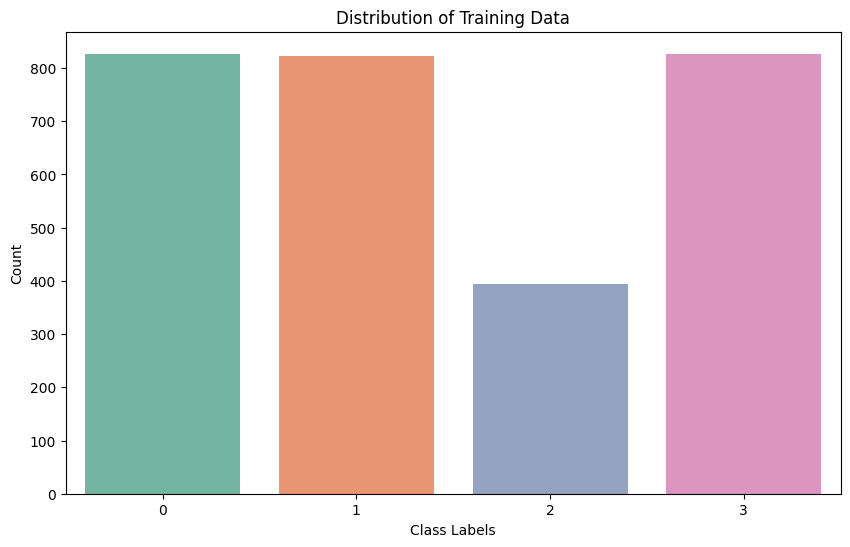

In [25]:
# prompt: plot the distribution of training data
#  with multiple color

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert y_train to a pandas Series
y_train_series = pd.Series(y_train)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_series, palette="Set2")
plt.title('Distribution of Training Data')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.show()


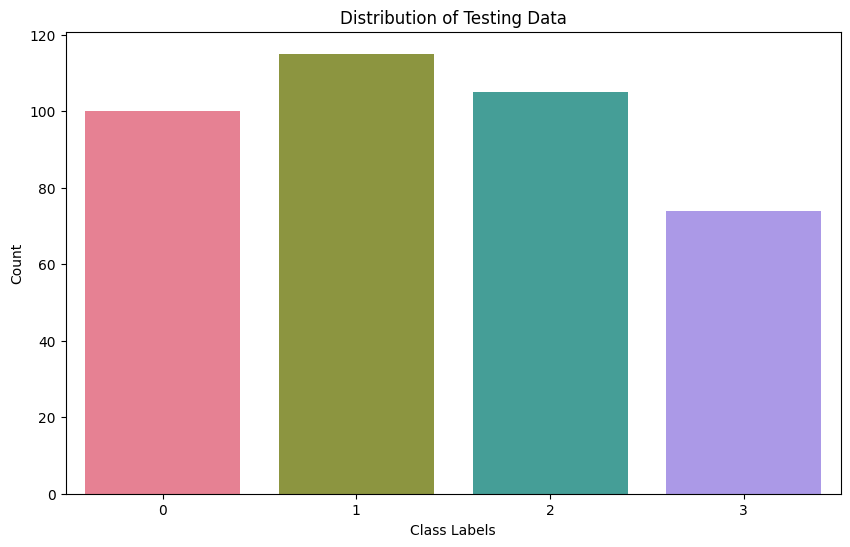

In [26]:
# prompt: plot the distribution of testing data with multiple color

import pandas as pd
import matplotlib.pyplot as plt
# Convert y_test to a pandas Series
y_test_series = pd.Series(y_test)

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=y_test_series, palette="husl")  # Using "husl" palette for multiple colors
plt.title('Distribution of Testing Data')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.show()


In [28]:
import numpy as np # You likely already have this imported but it's best to be explicit

X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

print('The length of X is',len(X))
print('The length of y is',len(y))

The length of X is 3264
The length of y is 3264


In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=RANDOM_STATE)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1,random_state=RANDOM_STATE)

In [54]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)
X_val=np.array(X_val)
y_val=np.array(y_val)

In [55]:
y_train=tf.keras.utils.to_categorical(y_train,num_classes=NUM_CLASSES)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=NUM_CLASSES)
y_val=tf.keras.utils.to_categorical(y_val,num_classes=NUM_CLASSES)

In [56]:
print('The shape of X_train',X_train.shape)
print('The shape of X_test',X_test.shape)
print('The shape of X_val',X_val.shape)
print('The shape of y_train',y_train.shape)
print('The shape of y_test',y_test.shape)
print('The shape of y_val',y_val.shape)

The shape of X_train (2643, 150, 150, 3)
The shape of X_test (327, 150, 150, 3)
The shape of X_val (294, 150, 150, 3)
The shape of y_train (2643, 4)
The shape of y_test (327, 4)
The shape of y_val (294, 4)


In [58]:
len(y_train)

2643

In [59]:
for i in range(5):
  print(y_train[i])

[0. 0. 0. 1.]
[0. 0. 1. 0.]
[0. 0. 0. 1.]
[0. 1. 0. 0.]
[0. 1. 0. 0.]


DATA Augmentation

In [60]:
train_datagen = ImageDataGenerator(rescale=RESCALE,rotation_range=ROTATION_RANGE,
            shear_range=SHEAR_RANGE,zoom_range=ZOOM_RANGE,horizontal_flip=HORIZONTAL_FLIP)

val_datagen=ImageDataGenerator(rescale=RESCALE)

test_datagen = ImageDataGenerator(rescale=RESCALE)

In [61]:
train_gen=train_datagen.flow(X_train,y_train,batch_size=BATCH_SIZE)
val_gen=val_datagen.flow(X_val,y_val,batch_size=BATCH_SIZE)
test_gen=test_datagen.flow(X_test,y_test,batch_size=BATCH_SIZE)

BUILD model

In [62]:
cnn=keras.models.Sequential(
[
    keras.layers.Conv2D(32,(FILTER_SIZE,FILTER_SIZE),activation='relu',input_shape=(SIZE,SIZE,CHANNEL)),
    keras.layers.MaxPooling2D(MAXPOOLING_SIZE,MAXPOOLING_SIZE),

    keras.layers.Conv2D(64,(FILTER_SIZE,FILTER_SIZE),activation='relu'),
    keras.layers.MaxPooling2D(MAXPOOLING_SIZE,MAXPOOLING_SIZE),

    keras.layers.Conv2D(128,(FILTER_SIZE,FILTER_SIZE),activation='relu'),
    keras.layers.MaxPooling2D(MAXPOOLING_SIZE,MAXPOOLING_SIZE),

    keras.layers.Conv2D(256,(FILTER_SIZE,FILTER_SIZE),activation='relu'),
    keras.layers.MaxPooling2D(MAXPOOLING_SIZE,MAXPOOLING_SIZE),

    keras.layers.Flatten(),

    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dropout(0.1),
    #output layer
    keras.layers.Dense(4,activation='softmax')
]
)

In [63]:
cnn.compile(optimizer=Adam(learning_rate=LEARNING_RATE),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [64]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                 factor=0.2,
                                                 patience=5,
                                                 min_lr=1e-7,
                                                 mode='min')

ealystopping=tf.keras.callbacks.EarlyStopping(patience=10,
                                            monitor='val_accuracy',
                                            restore_best_weights=True)

In [65]:
history=cnn.fit(train_gen,epochs=50,validation_data=val_gen
                ,verbose=1,
                callbacks=[ealystopping,reduce_lr])

Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 35s 308ms/step - accuracy: 0.4030 - loss: 1.2968 - val_accuracy: 0.5442 - val_loss: 1.0594 - learning_rate: 1.0000e-04
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 22s 159ms/step - accuracy: 0.5555 - loss: 1.0319 - val_accuracy: 0.5850 - val_loss: 0.9534 - learning_rate: 1.0000e-04
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 21s 162ms/step - accuracy: 0.6142 - loss: 0.9261 - val_accuracy: 0.6429 - val_loss: 0.8528 - learning_rate: 1.0000e-04
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 22s 174ms/step - accuracy: 0.6586 - loss: 0.8184 - val_accuracy: 0.6701 - val_loss: 0.8068 - learning_rate: 1.0000e-04
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 14s 161ms/step - accuracy: 0.7113 - loss: 0.7425 - val_accuracy: 0.6769 - val_loss: 0.7731 - learning_rate: 1.0000e-04
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 20s 161ms/step - accuracy: 0.7346 - loss: 0.6831 - val_accuracy: 0.7177 - val_loss: 0.6894 - learning_rate: 1.0000e-04
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 14s 159ms/step - acc

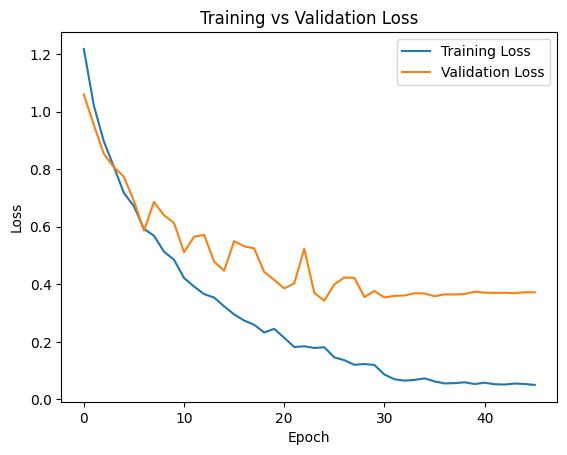

In [66]:
# prompt: plot the training vs validation loss graph

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step


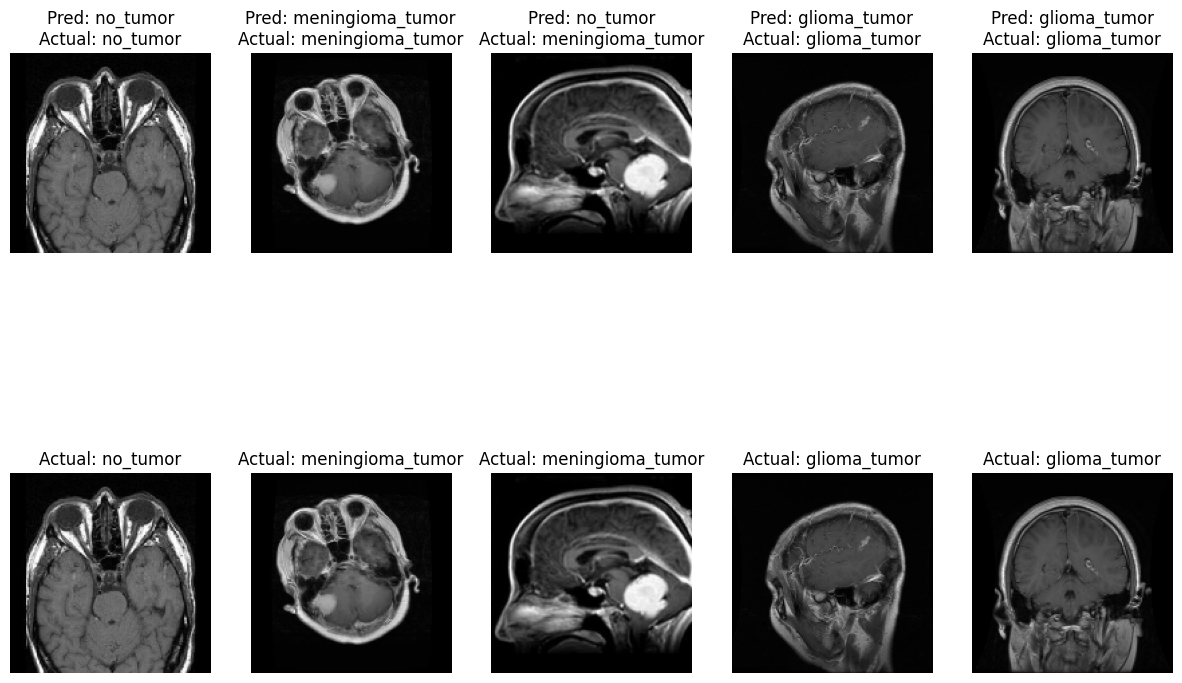

In [67]:
# prompt: test the validation data image on this training model and plot the predicted image with label and the target image with label

import matplotlib.pyplot as plt
import numpy as np
# Get a batch of validation data
X_val_batch, y_val_batch = next(val_gen)

# Predict on the batch
predictions = cnn.predict(X_val_batch)

# Get the predicted class for each image
predicted_classes = np.argmax(predictions, axis=1)

# Get the actual class for each image
actual_classes = np.argmax(y_val_batch, axis=1)

# Plot some of the images with their predicted and actual labels
n_images = 5  # Number of images to plot
plt.figure(figsize=(15, 10))
for i in range(n_images):
  plt.subplot(2, n_images, i + 1)
  plt.imshow(X_val_batch[i])
  plt.title(f"Pred: {LABELS[predicted_classes[i]]}\nActual: {LABELS[actual_classes[i]]}")
  plt.axis('off')

  plt.subplot(2, n_images, i + 1 + n_images)
  plt.imshow(X_val_batch[i])
  plt.title(f"Actual: {LABELS[actual_classes[i]]}")
  plt.axis('off')

plt.show()


In [76]:
X_val_batch, y_val_batch

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [77]:
X_val_batch.shape

(32, 150, 150, 3)

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 371ms/step


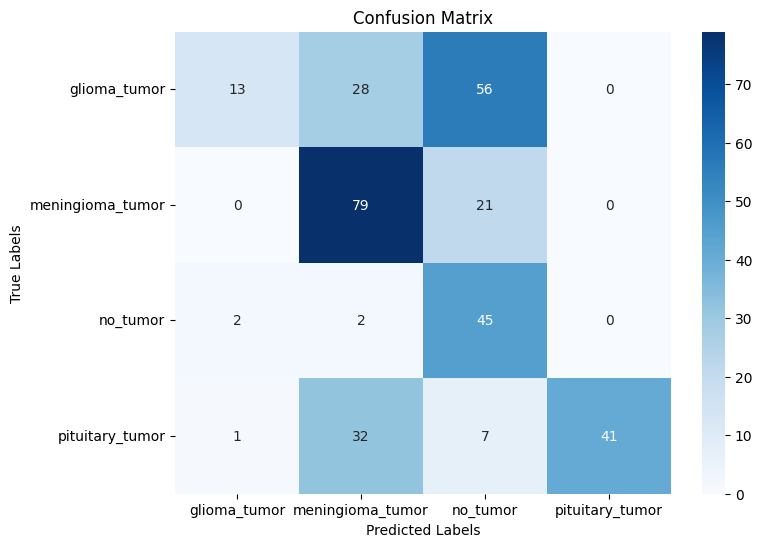

                  precision    recall  f1-score   support

    glioma_tumor       0.81      0.13      0.23        97
meningioma_tumor       0.56      0.79      0.66       100
        no_tumor       0.35      0.92      0.51        49
 pituitary_tumor       1.00      0.51      0.67        81

        accuracy                           0.54       327
       macro avg       0.68      0.59      0.52       327
    weighted avg       0.71      0.54      0.51       327

Accuracy: 0.5443425076452599


In [68]:
# prompt: plot the different matrix to check the accuracy

import matplotlib.pyplot as plt
import numpy as np
# Predict on the test set
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=LABELS, yticklabels=LABELS)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the classification report
print(classification_report(y_true, y_pred_classes, target_names=LABELS))

# Calculate and print the accuracy score
accuracy = accuracy_score(y_true, y_pred_classes)
print(f"Accuracy: {accuracy}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.9372 - loss: 0.2286
Test Accuracy: 0.9388379454612732


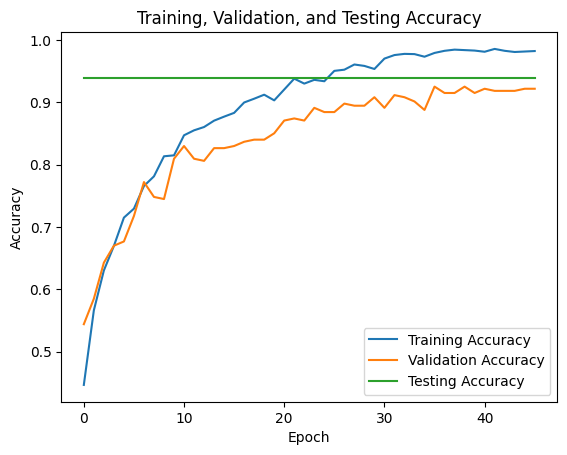

In [69]:
# prompt: plot the testing accuracy as well after checking on testing data

import matplotlib.pyplot as plt
# Evaluate the model on the test data
test_loss, test_acc = cnn.evaluate(test_gen, verbose=1)

# Print the test accuracy
print(f"Test Accuracy: {test_acc}")

# Plot the testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot([test_acc] * len(history.history['accuracy']), label='Testing Accuracy')  # Plot test accuracy as a horizontal line
plt.title('Training, Validation, and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


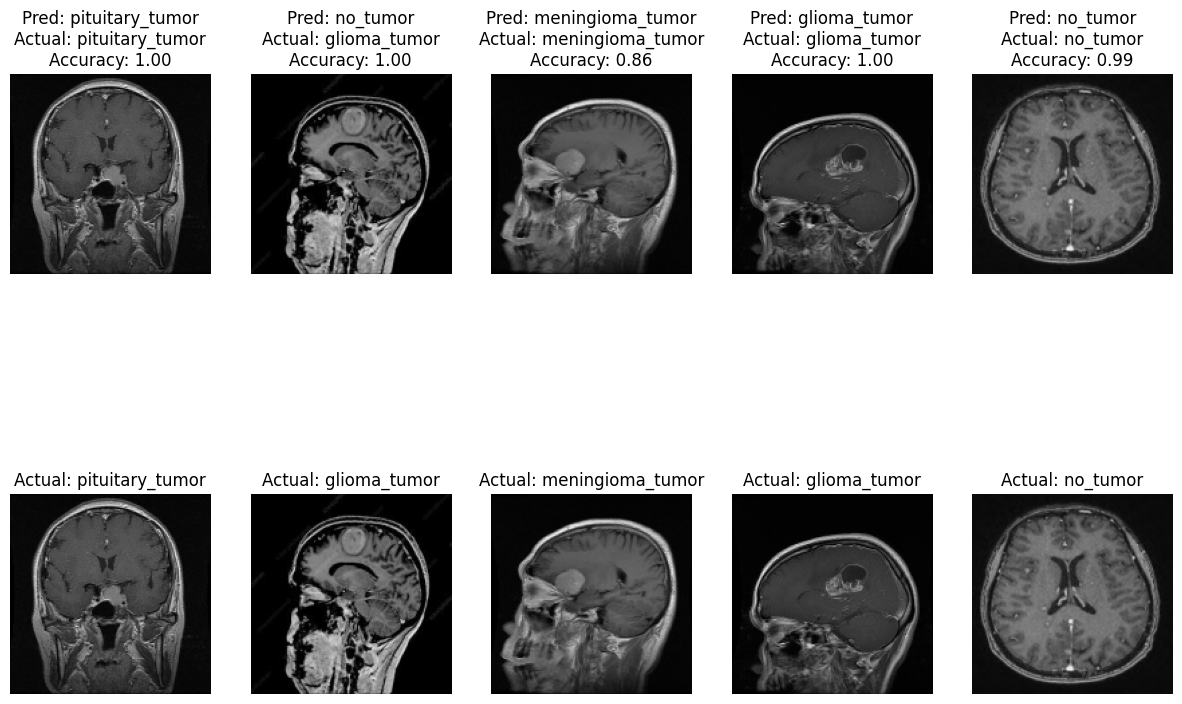

In [70]:
# prompt: test on testing image and plot the image with label and accuracy

import matplotlib.pyplot as plt
import numpy as np
# Get a batch of test data
X_test_batch, y_test_batch = next(test_gen)

# Predict on the batch
predictions = cnn.predict(X_test_batch)

# Get the predicted class for each image
predicted_classes = np.argmax(predictions, axis=1)

# Get the actual class for each image
actual_classes = np.argmax(y_test_batch, axis=1)

# Get the prediction probabilities for each class
prediction_probs = np.max(predictions, axis=1)

# Plot some of the images with their predicted and actual labels and accuracy
n_images = 5  # Number of images to plot
plt.figure(figsize=(15, 10))
for i in range(n_images):
  plt.subplot(2, n_images, i + 1)
  plt.imshow(X_test_batch[i])
  plt.title(f"Pred: {LABELS[predicted_classes[i]]}\nActual: {LABELS[actual_classes[i]]}\nAccuracy: {prediction_probs[i]:.2f}")
  plt.axis('off')

  plt.subplot(2, n_images, i + 1 + n_images)
  plt.imshow(X_test_batch[i])
  plt.title(f"Actual: {LABELS[actual_classes[i]]}")
  plt.axis('off')

plt.show()


In [ ]:
# prompt: use the concept of lime to check which pixel is contributing for the testing image to classify

import matplotlib.pyplot as plt
import numpy as np
!pip install lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Create a LimeImageExplainer object
explainer = lime_image.LimeImageExplainer()

# Select an image from the test set
image_index = 0  # Choose an index for the image you want to explain
image = X_test[image_index]
image = np.expand_dims(image, axis=0)  # Add batch dimension

# Define a prediction function for the model
def predict_fn(images):
  """
  This function takes an array of images and returns the predicted probabilities.
  """
  preds = cnn.predict(images)
  return preds

# Explain the prediction for the selected image
explanation = explainer.explain_instance(image[0].astype('double'), predict_fn, top_labels=4, hide_color=0, num_samples=1000)

# Get the segmentation mask for the explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)

# Display the image with the highlighted pixels
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.title(f"Explanation for Class: {LABELS[np.argmax(y_test[image_index])]}")
plt.show()


In [71]:
import matplotlib.pyplot as plt
import numpy as np
!pip install lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=92a5e409205656c00080575b4f3d3abefd30321d0bce7f831005dc70dc9673ca
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [72]:
# Create a LimeImageExplainer object
explainer = lime_image.LimeImageExplainer()

In [73]:
# Select an image from the test set
image_index = 0  # Choose an index for the image you want to explain
image = X_test[image_index]
image = np.expand_dims(image, axis=0)  # Add batch dimension

In [75]:
image.shape

(1, 150, 150, 3)

In [78]:
# Define a prediction function for the model
def predict_fn(images):
  """
  This function takes an array of images and returns the predicted probabilities.
  """
  preds = cnn.predict(images)
  return preds


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
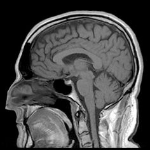

In [81]:
image[0]

In [82]:
y_test[0]

array([0., 0., 1., 0.])

In [87]:
# Explain the prediction for the selected image
explanation = explainer.explain_instance(image[0].astype('double'), predict_fn, top_labels=4, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

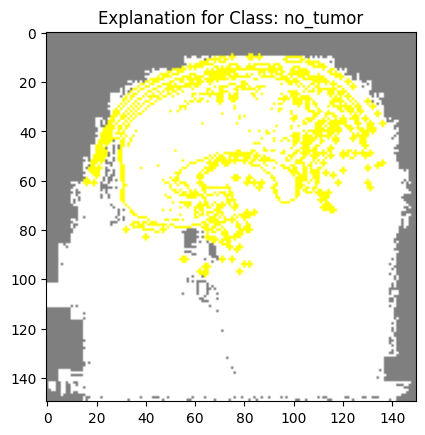

In [88]:
# Get the segmentation mask for the explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)

# Display the image with the highlighted pixels
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.title(f"Explanation for Class: {LABELS[np.argmax(y_test[image_index])]}")
plt.show()


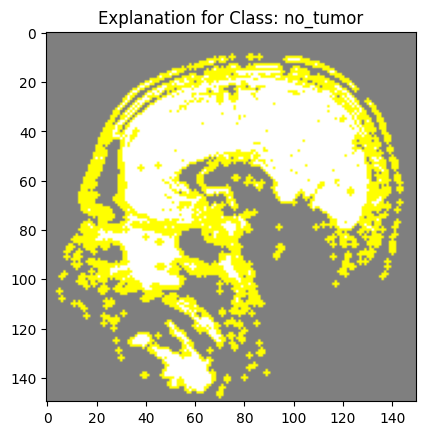

In [91]:
# prompt: lets do some different masking which looks clear

import matplotlib.pyplot as plt
import numpy as np
# Get the segmentation mask for the explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=True)

# Display the image with the highlighted pixels
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.title(f"Explanation for Class: {LABELS[np.argmax(y_test[image_index])]}")
plt.show()


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
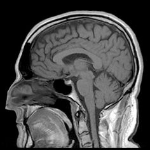

In [83]:
image[0]

In [94]:
# Select an image from the test set
image_index = 3 # Choose an index for the image you want to explain
image = X_test[image_index]
image = np.expand_dims(image, axis=0)  # Add batch dimension

In [99]:
# Explain the prediction for the selected image


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
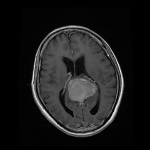

In [97]:
image[0]

In [98]:
y_test[3]

array([0., 1., 0., 0.])

In [101]:
explanation = explainer.explain_instance(image[0].astype('double'), predict_fn, top_labels=4, hide_color=0, num_samples=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

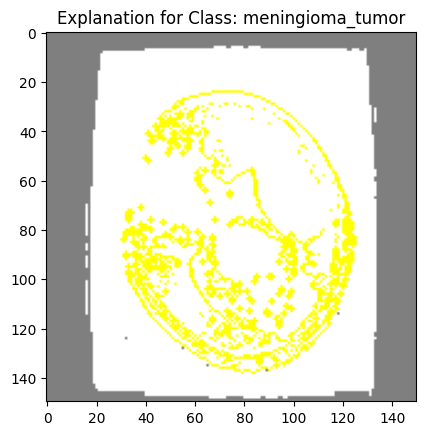

In [102]:
# Get the segmentation mask for the explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)

# Display the image with the highlighted pixels
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.title(f"Explanation for Class: {LABELS[np.argmax(y_test[image_index])]}")
plt.show()


array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
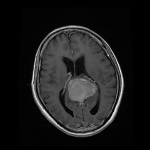

In [103]:
image[0]